# 求一元函数的最小值

求函数$y = f(x)$的最小值，即找到$x=x^*, y=y^*$使得
$$y^*=\underset{x}{\mathrm{min}}f(x)=f(x^*)$$

# 梯度下降法

1. 任意对$x$设置一个初始值：$x_0=a$; 学习率$\alpha$设置为很小的数如：$\alpha=0.1$（也可以在实战过程中，设置较大的学习率，观察函数y的变化）；
2. 设置迭代次数$n$如$n=10$，对$i=0,1,...,n$：
    - 求$y=f(x)$在$x_i=x_{i-1}$处的导数$f'(x_{i-1})$；
    - 更新$x_i=x_i-\alpha f'(x_{i-1}),\quad y_i=f(x_i)$；
3. 最后得到的$x_n, y_n$即为$y=f(x)$的近似最小值。

# 实战

$$
y = f(x) = x^2
$$

In [ ]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

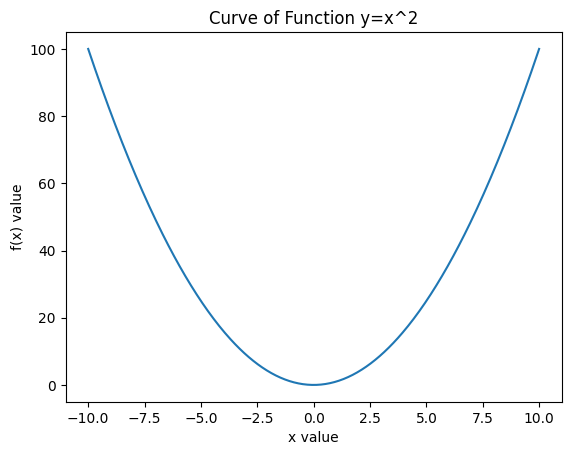

In [6]:
x_plot = np.linspace(-10, 10, 400)
y_plot = torch.tensor(x_plot)**2

# 绘制曲线
plt.plot(x_plot, y_plot)

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Curve of Function y=x^2')
plt.show()

## 使用梯度下降算法找到一元二次函数的最小值点

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(5.0, requires_grad=True)
y0 = x0**2

alpha = 0.1
epsilon = 0.0001

x_values = []
y_values = []

# 循环直到y的变化小于epsilon
while True:
    # 计算梯度
    y0.backward()
    y = y0.item()  # 保存y0在当前迭代的取值，用于判断迭代的停止条件
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y0 = x0**2
    # 检查是否满足结束条件
    if abs(y0.item() - y) < epsilon:
        break

y0.backward()
print("x0: ", x0, "y0: ", y0, "x0.grad: ", x0.grad)

x0:  tensor(0.0121, requires_grad=True) y0:  tensor(0.0001, grad_fn=<PowBackward0>) x0.grad:  tensor(0.0242)


## 观察梯度下降法在一元二次函数求最小值的过程

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(5.0, requires_grad=True)
y0 = x0**2

alpha = 0.1

x_values = []
y_values = []

for _iter in range(8):
    x_values.append(x0.item())
    y_values.append(y0.item())
    # 计算梯度
    y0.backward()
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y0 = x0**2

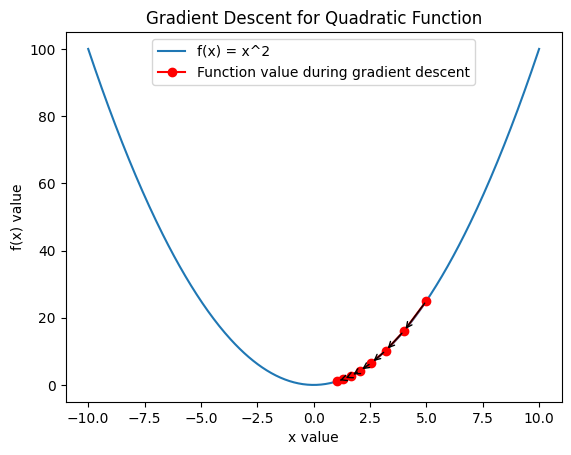

In [10]:
x_plot = np.linspace(-10, 10, 400)
y_plot = torch.tensor(x_plot)**2

# 绘制曲线
plt.plot(x_plot, y_plot, label='f(x) = x^2')
plt.plot(x_values, y_values, 'o-', label='Function value during gradient descent', color="red")

for i in range(1, len(x_values)):
    plt.annotate('', xy=(x_values[i], y_values[i]), xytext=(x_values[i-1], y_values[i-1]),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Gradient Descent for Quadratic Function')
plt.legend()
plt.show()

## 观察梯度下降法对sin(x)求最小值的过程

In [8]:
def target_func(x):
    return torch.sin(x)

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(0.0, requires_grad=True)

alpha = 0.1
epsilon = 0.0001

x_values = []
y_values = []

# 循环直到y的变化小于epsilon
for _iter in range(5):
    # 计算梯度
    x_values.append(x0.item())
    y0 = target_func(x0)
    y0.backward()
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y_values.append(y0.item())

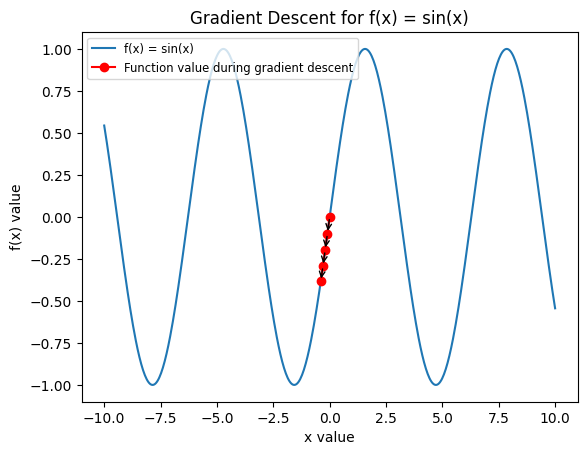

In [27]:
x_plot = torch.from_numpy(np.linspace(-10, 10, 500))
y_plot = target_func(x_plot)

# 绘制曲线
plt.plot(x_plot, y_plot, label='f(x) = sin(x)')
plt.plot(x_values, y_values, 'o-', label='Function value during gradient descent', color="red")

for i in range(1, len(x_values)):
    plt.annotate('', xy=(x_values[i], y_values[i]), xytext=(x_values[i-1], y_values[i-1]),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Gradient Descent for f(x) = sin(x)')
plt.legend(loc='upper left', fontsize='small')
plt.show()

## 二元函数梯度下降法实战

$$
y = f(x,y) = (4-2.1x^2+\frac{x^4}{3})x^2+xy+(-4+4y^2)y^2
$$

In [55]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [62]:
# 定义函数
def f(x, y):
    return ((4 - 2.1*x**2 + x**4 / 3.) * x**2 + x * y  + (-4 + 4*y**2) * y **2)

In [57]:
learning_rate = 0.1
num_iterations = 20
x0 = -1.0
y0 = -0.5
# 记录函数值
loss_values = []

x_values = [x0]
y_values = [y0]
# 执行梯度下降并记录函数值
x = torch.tensor(x0, requires_grad=True)
y = torch.tensor(y0, requires_grad=True)
for i in range(num_iterations):
    loss = f(x, y)
    loss_values.append(loss.item())
    loss.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
        x.grad.zero_()
        y.grad.zero_()
    x_values.append(x.item())
    y_values.append(y.item())

## 绘制函数值的变化图

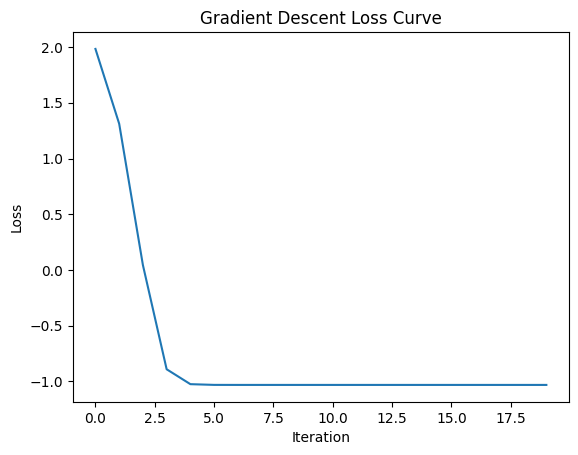

In [58]:
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

## 绘制迭代过程

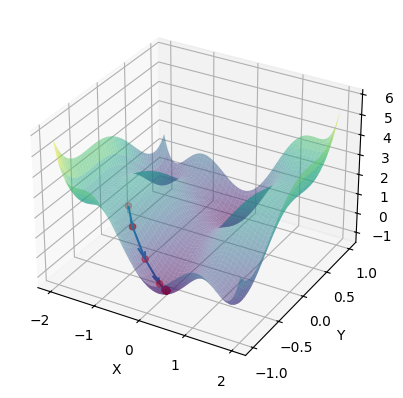

In [64]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(x_values, y_values, [f(x_val, y_val) for x_val, y_val in zip(x_values, y_values)], color='r')

for i in range(1, len(x_values)):
    x1, y1 = x_values[i-1], y_values[i-1]
    x2, y2 = x_values[i], y_values[i]
    u = x2 - x1
    v = y2 - y1
    w = f(x2, y2) - f(x1, y1)
    z1 = f(x1, y1)
    z2 = f(x2, y2)
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    ax.quiver(x1, y1, f(x1, y1), u, v, w, length=length, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# 附录

## 一元函数梯度下降收敛性说明

$$
\begin{align}
& \Delta y \approx f'(x)\Delta x \\
&\begin{rcases}
 y-y_0 \approx f'(x)(x-x_0) \\
 x-x_0 = -\alpha f'(x) \implies x=x_0-\alpha f'(x)
\end{rcases}
 \implies y \approx y_0-\alpha f'(x)^2 \leq y_0 \implies y \leq y_0
\end{align}
$$
- 即让$\Delta x$取负梯度并乘以一个系数可以逐步迭代找到函数y的最小值或局部最小值

## 多元函数梯度下降收敛性说明

$$
\begin{align}
&\nabla{f(x)} = 
\begin{pmatrix} 
f_{x_1}(x_1,x_2,...,x_n) \\
f_{x_2}(x_1,x_2,...,x_n) \\
\vdots \\
f_{x_n}(x_1,x_2,...,x_n) 
\end{pmatrix}=(f_{x_1}(x_1,x_2,...,x_n), ..., f_{x_n}(x_1,x_2,...,x_n))^T \\
&\Delta y=y-y_0 \quad
x-x_0=\Delta x=\begin{pmatrix} 
\Delta x_1 \\
\Delta x_2 \\
\vdots \\
\Delta x_n 
\end{pmatrix}=\begin{pmatrix} 
x_1 - x_{10} \\
x_2 - x_{20} \\
\vdots \\
x_n - x_{n0} 
\end{pmatrix}
\end{align}
$$

$$
\begin{align}
& \Delta y \approx \nabla f(x_0)^T\Delta x \\
& y-y_0 \approx \nabla f(x_0)^T(x-x_0) \\
&\begin{rcases}
 x-x_0 = -\alpha \nabla f(x_0)\implies x=x_0-\alpha\nabla f(x_0) & \\
 \nabla f(x_0)^T\nabla f(x_0)= f_{x_1}(x)^2+f_{x_1}(x)^2+...+f_{x_n}(x)^2\geq 0 
\end{rcases}
\implies 
\begin{rcases}
y \approx y_0-\alpha \nabla f(x_0)^T\nabla f(x_0) \leq 0 \\
0 < \alpha
\end{rcases}\implies y \leq y_0
\end{align}
$$
- 即让$\Delta x$取负梯度并乘以一个系数可以逐步迭代找到函数y的最小值或局部最小值